## imports and configs

In [ ]:
!conda install -c conda-forge featuretools

In [1]:
import featuretools as ft
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline

%config IPCompleter.use_jedi=False

ModuleNotFoundError: No module named 'featuretools'

In [2]:
data_path = r'C:\Users\wrigh\Code\stratascratch\sales_data_analysis\datasets'

In [3]:
# need to append all files into one (confirmed they have same structure)

# set directory for files
files = os.path.join(data_path, "sales_week_starting_*.csv")

files = glob.glob(files)

# for filename in os.listdir(directory):
#     f = os.path.join(directory, filename)
#     # checking if it is a file
#     if os.path.isfile(f):
        

In [4]:
files

['C:\\Users\\wrigh\\Code\\stratascratch\\sales_data_analysis\\datasets\\sales_week_starting_2012-10-01.csv',
 'C:\\Users\\wrigh\\Code\\stratascratch\\sales_data_analysis\\datasets\\sales_week_starting_2012-10-08.csv',
 'C:\\Users\\wrigh\\Code\\stratascratch\\sales_data_analysis\\datasets\\sales_week_starting_2012-10-15.csv',
 'C:\\Users\\wrigh\\Code\\stratascratch\\sales_data_analysis\\datasets\\sales_week_starting_2012-10-22.csv',
 'C:\\Users\\wrigh\\Code\\stratascratch\\sales_data_analysis\\datasets\\sales_week_starting_2012-10-29.csv',
 'C:\\Users\\wrigh\\Code\\stratascratch\\sales_data_analysis\\datasets\\sales_week_starting_2012-11-05.csv',
 'C:\\Users\\wrigh\\Code\\stratascratch\\sales_data_analysis\\datasets\\sales_week_starting_2012-11-12.csv',
 'C:\\Users\\wrigh\\Code\\stratascratch\\sales_data_analysis\\datasets\\sales_week_starting_2012-11-19.csv',
 'C:\\Users\\wrigh\\Code\\stratascratch\\sales_data_analysis\\datasets\\sales_week_starting_2012-11-26.csv',
 'C:\\Users\\wrigh\

In [5]:
df = pd.concat(map(pd.read_csv, files), ignore_index=True)

In [6]:
df.head()

,sale_time,purchaser_gender
0,2012-10-01 01:42:22,female
1,2012-10-01 02:24:53,female
2,2012-10-01 02:25:40,female
3,2012-10-01 02:30:42,female
4,2012-10-01 02:51:32,male


In [7]:
# change dtypes
df['sale_time'] = pd.to_datetime(df['sale_time'])

In [8]:
df['sale_time'].dt.date.min()

datetime.date(2012, 10, 1)

In [9]:
# this is confirmed as final files STARTS at 2013-09-09
df['sale_time'].dt.date.max()

datetime.date(2013, 9, 15)

## Question 1
**Plot daily sales for all 50 weeks.**

In [10]:
# daily sales: group sales by day
# week: week of sale_time

In [11]:
df['date'] = pd.to_datetime(df['sale_time'])

In [12]:
df

,sale_time,purchaser_gender,date
0,2012-10-01 01:42:22,female,2012-10-01 01:42:22
1,2012-10-01 02:24:53,female,2012-10-01 02:24:53
2,2012-10-01 02:25:40,female,2012-10-01 02:25:40
3,2012-10-01 02:30:42,female,2012-10-01 02:30:42
4,2012-10-01 02:51:32,male,2012-10-01 02:51:32
...,...,...,...
204324,2013-09-15 23:30:51,female,2013-09-15 23:30:51
204325,2013-09-15 23:42:02,female,2013-09-15 23:42:02
204326,2013-09-15 23:43:24,male,2013-09-15 23:43:24
204327,2013-09-15 23:43:32,male,2013-09-15 23:43:32


In [13]:
daily_sales_df = df['date'].groupby(df['date'].dt.floor('d')).size().reset_index(name='sales_amount')

In [14]:
daily_sales_df.rename(columns={'day':'sale_day'},inplace=True)

In [15]:
daily_sales_df.head()

,date,sales_amount
0,2012-10-01,514
1,2012-10-02,482
2,2012-10-03,499
3,2012-10-04,546
4,2012-10-05,476


In [16]:
# now make date the index for plotting
daily_sales_df.index = daily_sales_df['date']

In [17]:
daily_sales_df.drop(columns=['date'], inplace=True)

In [18]:
daily_sales_df

,sales_amount
date,
2012-10-01,514
2012-10-02,482
2012-10-03,499
2012-10-04,546
2012-10-05,476
...,...
2013-09-11,719
2013-09-12,735
2013-09-13,743


<AxesSubplot:title={'center':'daily sales over 50 weeks'}, xlabel='date'>

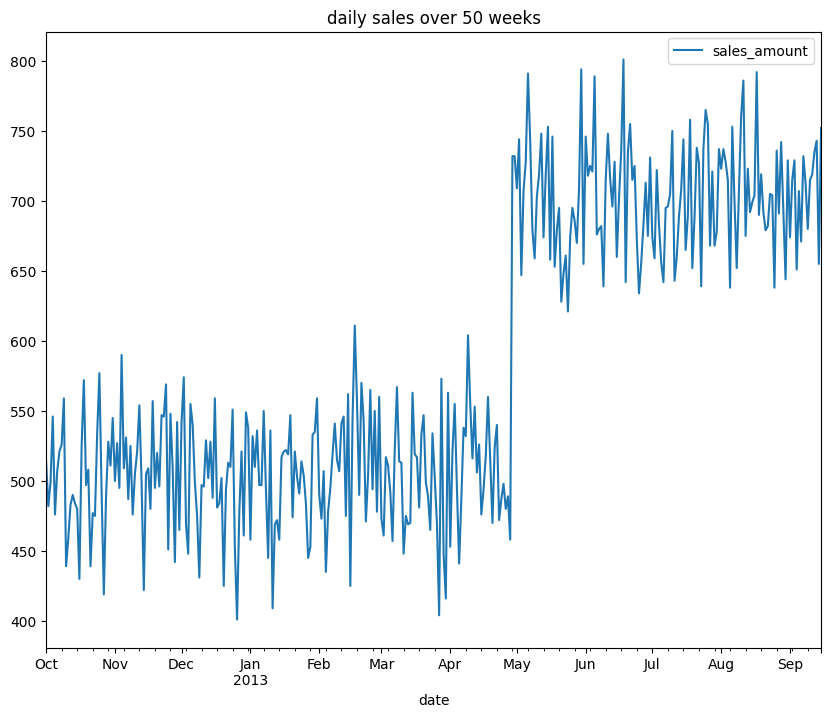

In [19]:
daily_sales_df.plot(figsize=(10,8), title='daily sales over 50 weeks')

Question 2

**It looks like there has been a sudden change in daily sales. What date did it occur?**

In [20]:
daily_sales_df

,sales_amount
date,
2012-10-01,514
2012-10-02,482
2012-10-03,499
2012-10-04,546
2012-10-05,476
...,...
2013-09-11,719
2013-09-12,735
2013-09-13,743


In [21]:
# need to find biggest gap between current row sales_amount and previous row sales_amount
biggest_change_df = daily_sales_df

In [22]:
biggest_change_df['previous_day_sales_amount'] = biggest_change_df['sales_amount'].shift(1).fillna(0).astype('int')

In [23]:
biggest_change_df

,sales_amount,previous_day_sales_amount
date,,
2012-10-01,514,0
2012-10-02,482,514
2012-10-03,499,482
2012-10-04,546,499
2012-10-05,476,546
...,...,...
2013-09-11,719,715
2013-09-12,735,719
2013-09-13,743,735


In [24]:
biggest_change_df['biggest_sales_difference'] = biggest_change_df['sales_amount'] - biggest_change_df['previous_day_sales_amount']

In [25]:
biggest_change_df

,sales_amount,previous_day_sales_amount,biggest_sales_difference
date,,,
2012-10-01,514,0,514
2012-10-02,482,514,-32
2012-10-03,499,482,17
2012-10-04,546,499,47
2012-10-05,476,546,-70
...,...,...,...
2013-09-11,719,715,4
2013-09-12,735,719,16
2013-09-13,743,735,8


In [26]:
biggest_change_df.nlargest(2, 'biggest_sales_difference')

,sales_amount,previous_day_sales_amount,biggest_sales_difference
date,,,
2012-10-01,514,0,514
2013-04-29,732,458,274


## Question 3

**Is the change in daily sales at the date you selected statistically significant? If so, what is the p-value?**

In [27]:
from scipy import stats

In [28]:
daily_sales_df.dropna(inplace=True)

In [29]:
# compare max change with all sales_amount column
stats.ttest_1samp(daily_sales_df['sales_amount'], 732)

Ttest_1sampResult(statistic=-26.367553024439697, pvalue=4.5681432390066193e-85)

Question 4

**Does the data suggest that the change in daily sales is due to a shift in the proportion of male-vs-female customers? Please use plots to support your answer (a rigorous statistical analysis is not necessary).**

In [30]:
df['sale_day'] = pd.to_datetime(df['sale_time']).dt.floor('d')

In [31]:
gender_portions_df = df.groupby(['sale_day', 'purchaser_gender']).size().reset_index(name='sales_amount')

In [32]:
gender_portions_df

,sale_day,purchaser_gender,sales_amount
0,2012-10-01,female,413
1,2012-10-01,male,101
2,2012-10-02,female,379
3,2012-10-02,male,103
4,2012-10-03,female,386
...,...,...,...
695,2013-09-13,male,537
696,2013-09-14,female,193
697,2013-09-14,male,462
698,2013-09-15,female,230


In [33]:
new_df = pd.DataFrame(gender_portions_df['sale_day'].unique(), columns=['sale_day'])
new_df['female_sales_amount'] = pd.Series(gender_portions_df[gender_portions_df['purchaser_gender'] =='female']['sales_amount']).reset_index(drop=True)
new_df['male_sales_amount'] = pd.Series(gender_portions_df[gender_portions_df['purchaser_gender'] =='male']['sales_amount']).reset_index(drop=True)

In [34]:
new_df

,sale_day,female_sales_amount,male_sales_amount
0,2012-10-01,413,101
1,2012-10-02,379,103
2,2012-10-03,386,113
3,2012-10-04,432,114
4,2012-10-05,368,108
...,...,...,...
345,2013-09-11,224,495
346,2013-09-12,225,510
347,2013-09-13,206,537
348,2013-09-14,193,462


In [35]:
new_df['gender_ratio'] = new_df['male_sales_amount'] / new_df['female_sales_amount']

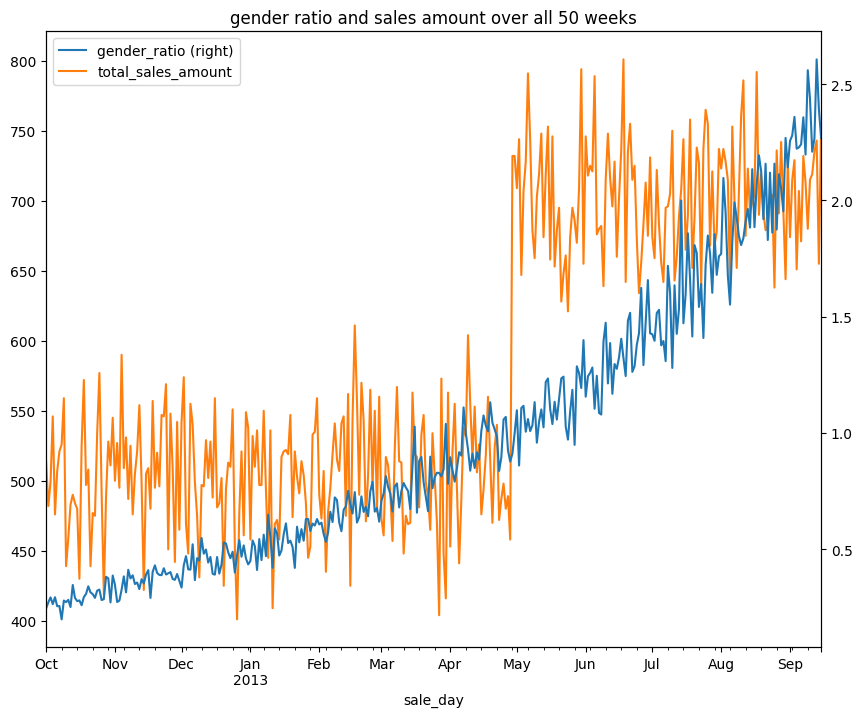

In [37]:
plot_df = new_df.copy()
plot_df['total_sales_amount'] = plot_df['male_sales_amount'] + plot_df['female_sales_amount']
plot_df.drop(columns=['female_sales_amount', 'male_sales_amount'], inplace=True)
plot_df.index = plot_df['sale_day']
plot_df.drop(columns=['sale_day'], inplace=True)
plot_df.plot(secondary_y = ['gender_ratio'], figsize = (10,8), title='gender ratio and sales amount over all 50 weeks')
plt.show()

## Question 5

**Assume a given day is divided into four dayparts: night (12:00AM - 6:00AM), morning (6:00AM to 12:00PM), afternoon (12:00PM to 6:00PM) and evening (6:00PM - 12:00AM). What is the percentage of sales in each daypart over all 50 weeks?**

In [38]:
# get base df
daypart_df = df.copy()

In [40]:
# convert to datetime
daypart_df['sale_time'] = pd.to_datetime(daypart_df['sale_time'])

In [47]:
# drop sale_day and date
# daypart_df.drop('date', axis=1, inplace=True)

In [55]:
import datetime as dt

In [61]:
# split sale_time into 4 parts per day
# extract sale hour to divide sales to the part of days
daypart_df['sale_hour']  = pd.to_datetime(daypart_df['sale_time']).dt.ceil('h').dt.hour
df.dtypes

sale_time           datetime64[ns]
purchaser_gender            object
date                datetime64[ns]
sale_day            datetime64[ns]
dtype: object

In [62]:
daypart_df

,sale_time,purchaser_gender,sale_hour
0,2012-10-01 01:42:22,female,2
1,2012-10-01 02:24:53,female,3
2,2012-10-01 02:25:40,female,3
3,2012-10-01 02:30:42,female,3
4,2012-10-01 02:51:32,male,3
...,...,...,...
204324,2013-09-15 23:30:51,female,0
204325,2013-09-15 23:42:02,female,0
204326,2013-09-15 23:43:24,male,0
204327,2013-09-15 23:43:32,male,0


In [ ]:
day

In [ ]:
# get sales column
daypart_df['sale_time'].groupby(daypart_df['sale_time'].d)
df['date'].groupby(df['date'].dt.floor('d')).size().reset_index(name='sales_amount')

In [49]:
daypart_df.head()

,sale_time,purchaser_gender
0,2012-10-01 01:42:22,female
1,2012-10-01 02:24:53,female
2,2012-10-01 02:25:40,female
3,2012-10-01 02:30:42,female
4,2012-10-01 02:51:32,male


In [64]:
def assign_day_part(hour):
    if hour > 6 and hour < 12:
        return 'morning'
    if hour > 12 and hour < 18:
        return 'afternoon'
    if hour > 18 and hour < 24:
        return 'evening'
    if hour > -1 and hour < 6:
        return 'night'

In [67]:
# lambda
# apply the defined function and create day_part column
daypart_df['day_part'] = daypart_df['sale_hour'].apply(assign_day_part)

In [70]:
daypart_df.drop(['purchaser_gender', 'sale_hour', 'period'], axis=1, inplace=True)

In [71]:
daypart_df

,sale_time,day_part
0,2012-10-01 01:42:22,night
1,2012-10-01 02:24:53,night
2,2012-10-01 02:25:40,night
3,2012-10-01 02:30:42,night
4,2012-10-01 02:51:32,night
...,...,...
204324,2013-09-15 23:30:51,night
204325,2013-09-15 23:42:02,night
204326,2013-09-15 23:43:24,night
204327,2013-09-15 23:43:32,night


In [78]:
# add sales
df_pct_sales = daypart_df.groupby(daypart_df['day_part']).size().reset_index(name='day_part_sales_amount')

In [79]:
df_pct_sales

,day_part,day_part_sales_amount
0,afternoon,68119
1,evening,41111
2,morning,49833
3,night,13567
